# TESS light curve analysis with `lightkurve`

In this notebook we will analyze TESS data for our planet-host stars with the goal of making a phase-folded exoplanet transit plot.  We will overlay this plot with our HPF transit spectroscopy measurements.  The two science goals are:  

- See if the HPF signals respond to the transit
- See if the HPF signals respond to the stellar rotation signal

In [46]:
import lightkurve as lk
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

Let's start with HAT-P-67b.

In [48]:
sr = lk.search_lightcurve('HAT-P-67')

In [49]:
sr_2 = lk.search_targetpixelfile('HAT-P-67') #data cube: add up pixels in each picture

In [50]:
sr_2

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,SPOC,120,198588220,0.0
1,TESS Sector 24,2020,TESS-SPOC,1800,198588220,0.0
2,TESS Sector 26,2020,SPOC,120,198588220,0.0
3,TESS Sector 26,2020,TESS-SPOC,1800,198588220,0.0


In [51]:
sr

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 24,2020,SPOC,120,198588220,0.0
1,TESS Sector 24,2020,TESS-SPOC,1800,198588220,0.0
2,TESS Sector 24,2020,QLP,1800,198588220,0.0
3,TESS Sector 26,2020,SPOC,120,198588220,0.0
4,TESS Sector 26,2020,TESS-SPOC,1800,198588220,0.0
5,TESS Sector 26,2020,QLP,1800,198588220,0.0


In [52]:
tpf_raw = sr_2[0].download() #use interact()

In [53]:
lc_raw = sr[1].download()

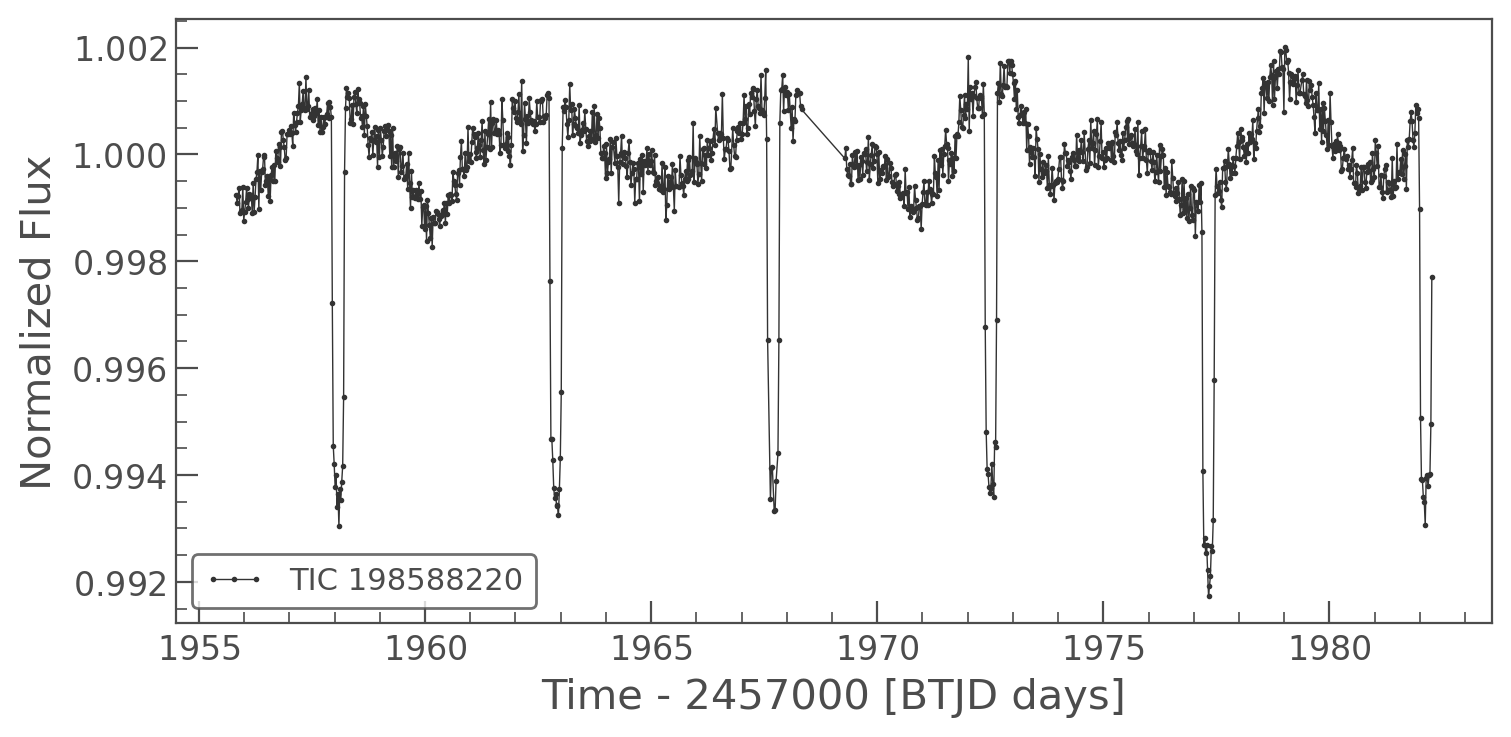

In [54]:
ax = lc_raw.normalize().plot(marker='.', linestyle=None)
#ax.set_ylim(0, 1.05)
plt.savefig('C:/Users/jojoa/GitHub/disperse/figures/HAT-P-67_TESS.png')

The star flux changes by about +/- 0.2%, and the exoplanet transit depth is about 0.7%.  We want to temporarily remove the star's variation so that we can isolate the exoplanet transit signal.

In [35]:
planet_period = 4.81010250
ax.fold(period=planet_period).plot();

AttributeError: 'AxesSubplot' object has no attribute 'fold'

In [21]:
pg = lc_raw.to_periodogram()

<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

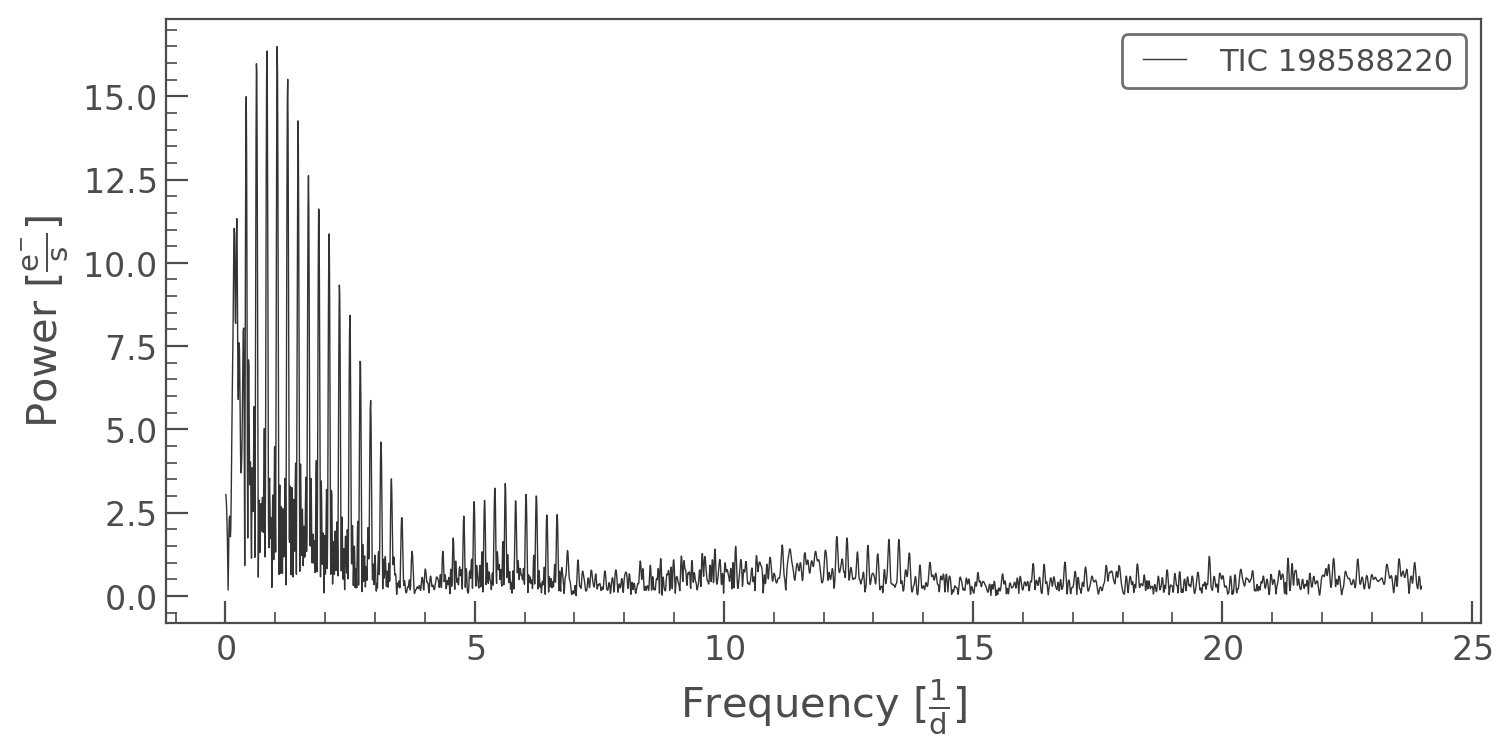

In [22]:
pg.plot()

In [23]:
period = pg.period_at_max_power
period

<Quantity 0.96488828 d>

In [10]:
orbital_period = 4.81010250
t_c = 2455961.38467
t_c_btjd = t_c-2457000.0

In [11]:
lc_folded = lc_raw.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

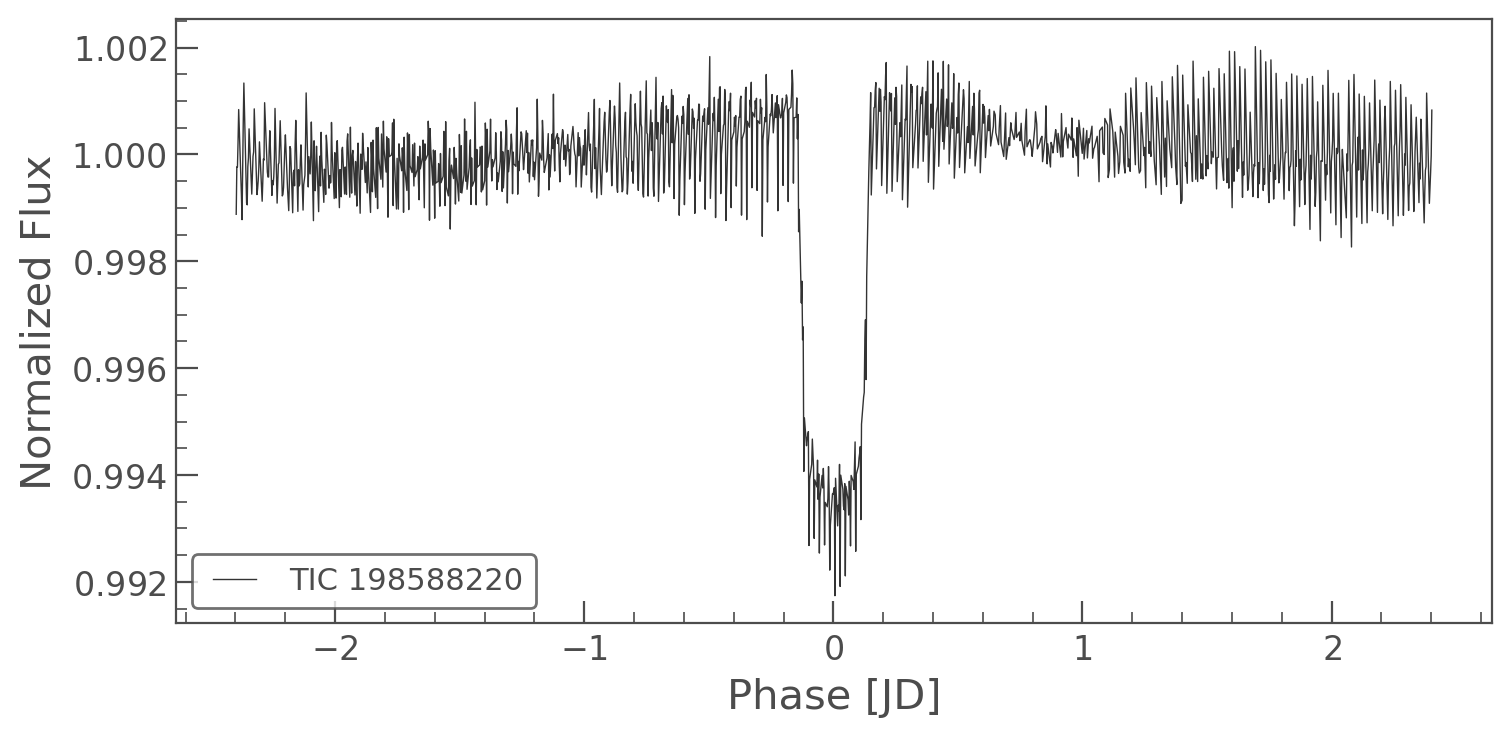

In [12]:
lc_folded.plot()

In [13]:
lc_raw2 = sr[0].download()

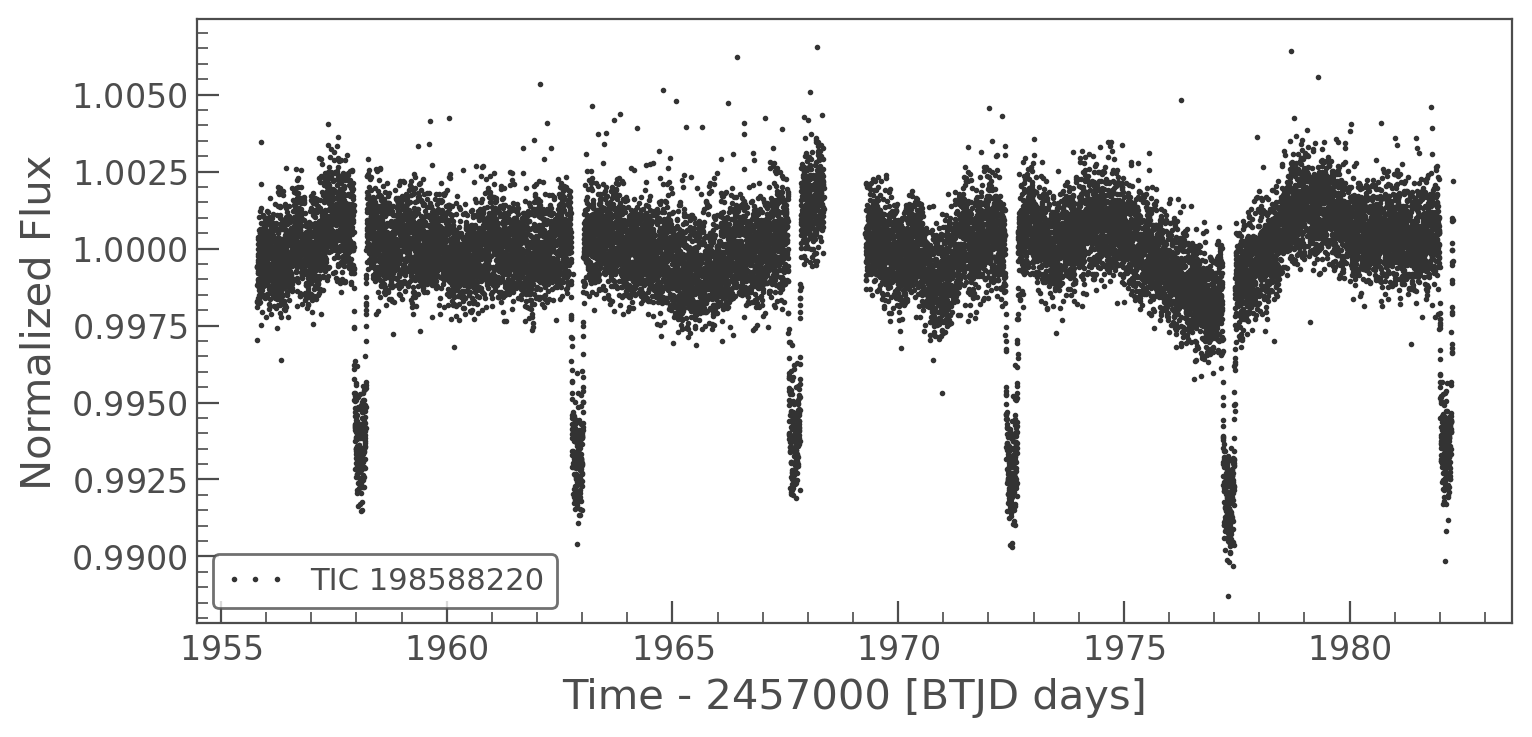

In [14]:
ax = lc_raw2.normalize().plot(marker='.', linestyle='none')
#ax.set_ylim(0, 1.05)

In [15]:
lc_flat = lc_raw2.flatten(window_length=1621)

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

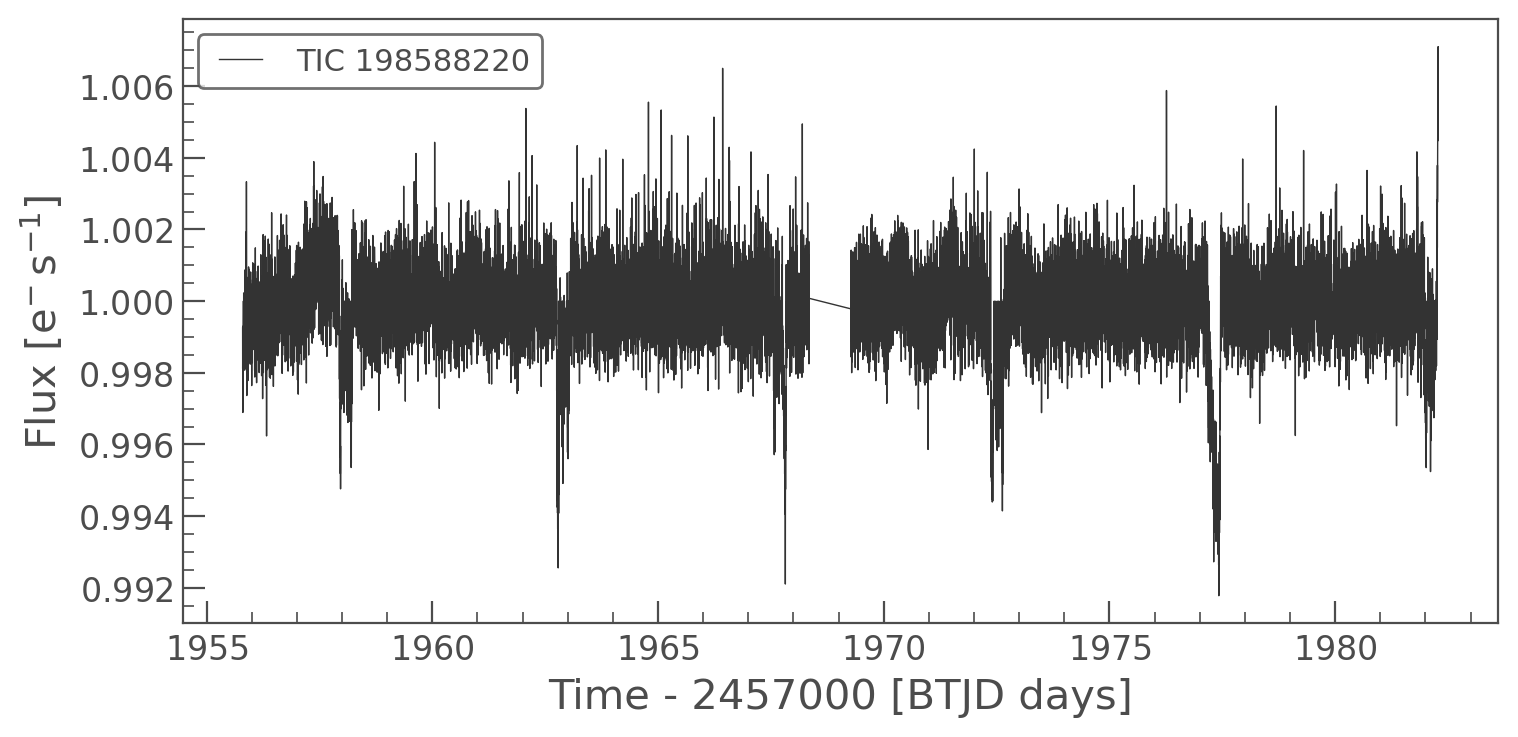

In [16]:
lc_flat.plot()

In [17]:
lc_folded2 = lc_raw2.fold(period=orbital_period, epoch_time=t_c_btjd).normalize()

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

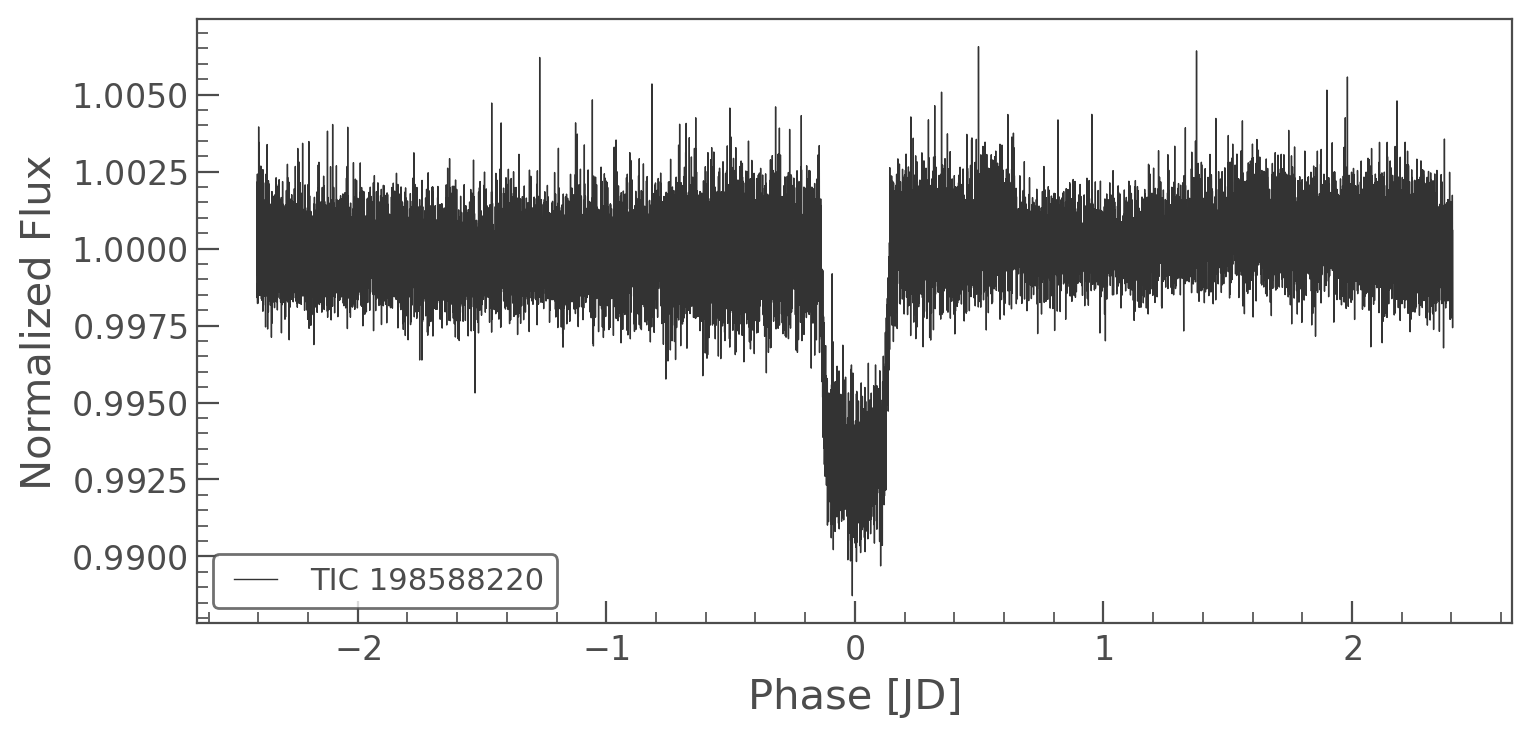

In [18]:
lc_folded2.plot()